# Contenidos

* [1. Teorema de Bayes e inferencia estadística](#1.-Teorema-de-Bayes-e-inferencia-estadística)
	* [1.1 Estadística Frecuentista vs Bayesiana](#1.1-Estadística-Frecuentista-vs-Bayesiana)
		* [1.1.1 El mundo según Bayes](#1.1.1-El-mundo-según-Bayes)
	* [1.2 Interpretación Bayesiana (_subjetiva_) de la probabilidad](#1.2-Interpretación-Bayesiana-%28_subjetiva_%29-de-la-probabilidad)
	* [1.3 El teorema de Bayes](#1.3-El-teorema-de-Bayes)
	* [1.4 Estadística Bayesiana en tres pasos](#1.4-Estadística-Bayesiana-en-tres-pasos)
	* [1.5 Estimación de un solo parámetro](#1.5-Estimación-de-un-solo-parámetro)
		* [1.5.1 El problema del diagnóstico](#1.5.1-El-problema-del-diagnóstico)
		* [1.5.2 El problema de la moneda](#1.5.2-El-problema-de-la-moneda)
			* [1.5.2.1 Definiendo el _a priori_](#1.5.2.1-Definiendo-el-_a-priori_)
			* [1.5.2.2 Definiendo el _likelihood_](#1.5.2.2-Definiendo-el-_likelihood_)
			* [1.5.2.3 Obteniendo el _a posteriori_](#1.5.2.3-Obteniendo-el-_a-posteriori_)
			* [1.5.2.4 Notación y visualización de modelos Bayesianos](#1.5.2.4-Notación-y-visualización-de-modelos-Bayesianos)
			* [1.5.2.5 Obteniendo los datos](#1.5.2.5-Obteniendo-los-datos)
			* [1.5.2.6 Calculando el _a posteriori_.](#1.5.2.6-Calculando-el-_a-posteriori_.)
			* [1.5.2.7 Analizando los resultados](#1.5.2.7-Analizando-los-resultados)
	* [1.6 Influencia y elección del _a priori_](#1.6-Influencia-y-elección-del-_a-priori_)
	* [1.7 Interpretación del  _a posteriori_](#1.7-Interpretación-del--_a-posteriori_)
		* [1.7.1 ¿Está nuestra moneda sesgada?](#1.7.1-¿Está-nuestra-moneda-sesgada?)
		* [1.7.2 Pruebas predictivas _a posteriori_](#1.7.2-Pruebas-predictivas-_a-posteriori_)
	* [1.8 Para seguir leyendo](#1.8-Para-seguir-leyendo)


In [2]:
%matplotlib inline
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import scipy.stats as stats
import seaborn as sns
from plot_post import plot_post  # una función distribuida con la notebook para graficar el a posteriori

/usr/local/lib/python3.5/dist-packages/matplotlib/__init__.py:872: UserWarning: axes.color_cycle is deprecated and replaced with axes.prop_cycle; please use the latter.
  warnings.warn(self.msg_depr % (key, alt_key))


# 1. Teorema de Bayes e inferencia estadística

En este curso aprenderemos sobre un paradigma en estadística llamado usualmente estadística Bayesiana. El nombre se debe a Thomas Bayes (1702-1761) un ministro presbiteriano, y matemático aficionado, quien derivó por primera vez lo que ahora conocemos como el **teorema de Bayes**, el cual fue publicado (postumanente) en 1763. Sin embargo una de las primeras personas en realmente desarrollar métodos Bayesianos, fue Pierre-Simon Laplace (1749-1827), por lo que tal vez sería un poco más correcto hablar de estadística Laplaciana y no Bayesiana.

Existe otro paradigma estadístico llamado estadística clásica o frecuentista. Si ustedes han tenido un curso de estadística (ya sea en el grado o posgrado) es casi seguro que dicho curso fue sobre métodos frecuentistas (aun cuando esto no haya sido explicitado). Es interesante notar que mientras los orígenes de las estadística Bayesiana se remontan al siglo XVII. Los métodos "_clásicos_" (o frecuentistas) fueron desarrollados principalmente durante el siglo XX! De hecho una de las motivaciones para desarrollar métodos frecuentistas fue un sentimiento e ideología anti-bayesiano.

A lo largo del curso contrastaremos algunas de las diferencias y similitudes entre ambas aproximaciones a la estadística. 

Mucho se ha escrito sobre las ventajas y desventajas de métodos frecuentistas y Bayesianos, discusión que considero sumamente interesante. Para el curso he adoptado un posición más pragmática y nos centraremos en como hacer estadística Bayesiana sin entrar demasiado en la discusión filosófico/matemática sobre el tema. Sin embargo he intentado proveer de referencias a material donde se da esta discusión para que quien así lo desee pueda informarse.

## 1.1 Estadística Frecuentista vs Bayesiana

Bajo cualquier paradigma estadístico encontraremos los siguientes elementos:

1. Algunas cantidades que son desconocidas, pero queremos conocer. Estas cantidades son llamadas **parámetros**
2. Algunas cantidades son observadas y que sospechamos contienen información sobre los parámetros: Estas cantidades son llamadas **datos** 
3. Una (o más) construcciones matemáticas que relacionan los datos con los parámetros. Estos son los llamados **modelos**.

En un paradigma frecuentista los datos son considerados aleatorios. La razón es que cada vez que realizamos un experimento u observación obtenemos valores diferentes para los datos. Por el contrario se considera que existen valores verdaderos para los parámetros y que estos valores son fijos, es por ello que en estadística frecuentista las estimaciones se condicionan sobre los parámetros, es decir el modelo general en estadística frecuentista es:

$$f(y | \theta)\\$$


Donde el modelo $f$ acepta como argumentos los datos $y$ condicionados (el simbolo $|$ es usado para indicar una probabilidad condicional) a valores particulares de $\theta$.

La inferencia frecuentista típicamente involucra es uso de **estimadores** para los parámetros desconocidos. Los estimadores son fórmulas que devuelven estimaciones como función de los datos. Los estimadores se eligen de acuerdo a diversos criterios de optimalidad. Como pueden ser  insesgadez, eficiencia, convergencia y robustez (consistencia).

Supongamos que hemos recolectado datos sobre la prevalencia de alguna enfermedad en una población dada. Hemos recolectado datos de $n$ pacientes de los cuales $y$ han sido diagnosticados con la enfermedad. Un estimador frecuentista de la prevalencia $p$ de dicha enfermedad será:

$$p = \frac{y}{n}$$

¿Por qué esta función en particular? Si bien la respuesta es tan intuitiva que parece _obvia_ es posible justificar (matemáticamente) el uso de ese estimador ya que puede demostrarse que este estimador provee de una estimación no-sesgada (no sobre estima ni subestima a $p$) y con mínima varianza (la dispersión respecto del valor real de $p$ es mínima).

En el universo frecuentista cada vez que se quiere estimar una cantidad es necesario introducir nuevos estimadores.

### 1.1.1 El mundo según Bayes

En el universo Bayesiano los datos son considerados fijos. En el sentido que aún si los concebimos como variables aleatorias una vez que los datos son recolectados estos ya no cambian. Los parámetros de nuestro modelo son considerados aleatorios, no por que necesariamente lo sean si no por que desconocemos los valores que pueden tomar. El grado de incertidumbre sobre los valores desconocidos se modelan usando probabilidades. Por lo tanto en estadística Bayesiana lo que nos suele interesar determinar es:

$$P(\theta | y)$$

Es decir la probabilidad de que $\theta$ tome ciertos valores dado (o condicionado en) los valores observados de $y$. En algún momento de la historia la estadistica Bayesiana recibió el nombre de **probabilidad inversa**, ya que infiere a partir de las observaciones los parámetros, lo que se suele interpretar como inferir las causas a partir de los efectos.

En estadística Bayesiana existe un solo estimador para todos los posibles problemas que se nos presenten. Este estimador se conoce como teorema de Bayes (o regla de Bayes o formula de Bayes). Antes de presentar este único estimador, repasemos rápidamentes algunos conceptos sobre probabiliad.

## 1.2 Interpretación Bayesiana (_subjetiva_) de la probabilidad

Las probabiliades son números entre 0 y 1 (incluyendo ambos extremos). En estadística Bayesiana las probabilidades son usadas para cuantificar la confianza que tenemos en que un evento ocurra. Desde este punto de vista es totalmente razonable preguntar cual es la probabilidad de que la masa de Saturno sea $5 \times 10^{26}$ kg, o hablar sobre la probabilidad de lluvia durante el 25 de Mayo de 1810, o la probabilidad de que mañana amanezca.

La lógica aristotélica permite razonar de forma correcta cuando los enunciados son verdaderos o falsos (cuando hay certezas). A fin de razonar, de forma correcta, en presencia de incertidumbre  es necesario extender la lógica aristotélica. En 1946, Richard Cox demostró que tal extensión es posible si asignamos probabilidades a los enunciados y si las probabilidades usadas respetan las conocidas reglas de la teoría de probabilidades:

La regla de la suma:
$$P(A) + P (\neg A) = 1$$ 

La regla del producto:
$$P(A, B) = P(A|B) \times P(B)$$ 

Siendo p(falso)= 0 y p(verdadero) = 1

Si no estamos seguros de la factibilidad de un evento, entonces es matemáticamente razonable asignar un valor entre 0 y 1, de acuerdo al grado de confianza que tenemos de que ocurra dicho evento. 

Dado que las probabilidades son una medida de la incerteza con la que conocemos una cantidad y no necesariamente una propiedad de la naturaleza, distintas personas podrán asignar distintas probabilidades a un mismo evento. Por ello se suele decir que la estadística Bayesiana es subjetiva (y no como un cumplido!). Sin embargo, este uso de las probabilidades simplemente refleja un hecho trivial, distintas personas poseen diferente información (la cual bien podría ser rotulada de _objetiva_) por lo que no necesariamente estarán de acuerdo en la factibilidad de un evento. Una persona que sabe que una moneda está sesgada hacia cara, maneja información distinta de otra que asume que una moneda tiene igual chance de caer cara o seca. De todas formas, si ambas personas hacen el experimento de arrojar esa moneda al aire varias veces, la probabilidad que cada uno asigna al _evento cara_ irá convergiendo a un mismo valor (aun si nunca coincide exactamente). Más adelante realizaremos tal experimento de forma computacional.

Como se verá en el resto del curso la estadística Bayesiana (al menos en su sentido moderno dentro de las ciencias exactas, naturales y sociales) es tan _subjetiva_ u _objetiva_ como los métodos estadísticos no-bayesianos u otros formas de modelado usadas en ciencia.

Para empezar a ponernos un poco mas concreto veamos el teorema de Bayes que es la base la estadística Bayesiana.

## 1.3 El teorema de Bayes

Según la regla del producto tenemos que la probabiliad de que ocurra un evento A y uno B, si ambos son independientes, es igual al producto de sus probabilidades.

$$P(A, B) = P(A) \times P(B)$$ 

Pero ¿Qué pasa en cuando los eventos no son independientes? En es caso podes decir que:

$$P(A, B) = P(A|B) \times P(B)$$ 

$p(A|B)$ es lo que se conoce como probabilidad condicional y se lee _la probabilidad de $A$ dado $B$_. Y representa la probabilidad de que ocurra $A$ dado que sabemos $B$ (o _condicionado_ a que sabemos $B$). Ya estamos muy cerca del teorema de Bayes, pero detengamonos un segundo a contemplar el significado de una probabilidad condicional. Reordenando la ecuación anterior se ve que:

$$P(A|B) = \frac{P(A, B)}{P(B)}$$ 

Es decir $p(A|B)$ es la probabilidad de que ocurra $A$ y $B$ de forma conjunta ($p(A, B)$), pero relativo a la probabilidad de que ocurra $p(B)$. ¿Por qué dividimos por $p(B)$? Debido a que conocer $B$ equivale a decir que el espacio total de posibilidades se ha reducido a $B$, es decir es necesario normalizar. ¿Cuál es la probabilidad de arrojar un dado y obtener 1? $\frac{1}{6}$ (asumiendo un dado no trucado) y ¿Cuál es la probabilidad de arrojar un dado y obtener 1 dado que he obtenido un número impar? $\frac{1}{3}$ (asumiendo nuevamente un dado no trucado). De hecho es posible asegurar que:

$$P(A|B) >= P(A)$$

Si $B$ aporta información sobre $A$ (obtuve un número impar), entonces $P(A|B) > P(A)$. Si el saber $B$ no aporta ninguna informacion sobre $A$ (las rosas son rojas), entonces $P(A|B) = P(A)$. En este último caso tendremos que ambas variables son independientes entre si y podemos escribir nuevamente.

$$P(A, B) = P(A) \times P(B)$$


Luego de este pequeño desvío por la probabilidad condicional sigamos nuestro camino.

El teorema de Bayes es una consecuencia directa de la regla del producto, veamos.

$$P(H,D) = P(H|D) \times P(D)$$
$$P(D,H) = P(D|H) \times P(H)$$

y dado que:

$$P(H,D) = P(D,H)$$

Podemos escribir que:

$$P(H|D) \times P(D) = P(D|H) \times P(H)$$

Reordenando llegamos al teorema de Bayes.

$$P(H|D) = \frac{P(D|H) P(H)}{P(D)}$$

El cual también suele ser escrito de la siguiente forma:

$$P(H|D) = \frac{P(D|H)P(H)}{\sum_{H^*} P(D|H^*)P(H^*)}$$

En esta segunda forma el valor de $H$ en el numerador hace referencia a un valor particular, mientras que en el denominador $H^*$ hace referencia a todos los valores posibles de $H$. La sumatoria es reemplazada por una integral en el caso que estemos hablando de valores continuos y no discretos.

Esta ecuación (de aspecto, casi trivial) es invaluable por que nos permite relacionar la probabilidad $P(H|D)$ con $P(D|H)$. Si reemplazamos $H$ por _hipótesis_ y $D$ por _datos_ creo que empieza a generarse cierta intuición acerca de la importancia del teorema de Bayes en ciencia. Para poder hacer inferencia la hipótesis $H$, toma la forma de cantidades numéricas desconocidas que debemos averiguar y que llamamos parámetros.


Cada término del teorema de Bayes tiene un nombre específico:

* $P(H|D)$: _a posteriori_ 
* $P(D|H)$: _likelihood_ (_verosimilitud_)
* $P(H)$: _a priori_
* $P(D)$: _evidencia_



El **_a priori_** es la forma de introducir conocimiento previo sobre los valores que pueden tomar los parámetros. A veces cuando no sabemos demasiado se suelen usar _a prioris_ que asignan igual probabilidad a todos los valores de los parámetros, otras veces se puede elegir _a prioris_ que restrijan los valores de los parámetros a rangos razonables, algo que se conoce como regularización, por ejemplo solo valores positivos. Muchas veces contamos con información mucho más precisa como medidas experimentales previas o límites impuesto por alguna teoría.

El **_likelihood_** es la forma de incluir nuestros datos en el análisis. Es una expresión matemática que especifica la plausibilidad de los datos. El _likelihood_ es central tanto en estadística Bayesiana como en estadística no-Bayesiana. A medida que la cantidad de datos aumenta el _likelihood_ tiene cada vez más peso en los resultados, esto explica por que a veces los resultados de la estadística Bayesiana y frecuentista coinciden cuando la muestra es _grande_.

El **_a posteriori_** es la distribución de probabilidad para los parámetros. Es la consecuencia lógica de haber usado un conjunto de datos un _likelihood_ y un _a priori_. Se lo suele pensar como la versión actualizada del _a priori_. De hecho un _a posteriori_ puede ser un _a priori_ de un análisis a futuro.

La **_evidencia_** (o _likelihood marginal_) es la probabilidad de observar los datos $D$ promediado sobre todas los posibles hipótesis (o conjunto de parámetros) $H$. Si la oración anterior no es muy clara, no hay problema ya veremos ejemplos que clarificarán este concepto. En general, la _evidencia_ puede ser vista como una simple constante de normalización que en muchos problemas prácticos puede (y suele) omitirse sin perdida de generalidad. Por lo que el teorema de Bayes suele aparecer escrito como

$$P(H|D) \propto P(D|H) P(H)$$


El rol de todos estos términos irá quedando más claro a medida que avancemos.

## 1.4 Estadística Bayesiana en tres pasos

El teorema de Bayes es el único estimador usado en estadística Bayesiana. Lo que hace, al menos en principio, sea conceptualmente simple de usar. Según Gelman et al. (2013) la estadística Bayesiana se reduce a tres pasos:

1. **Crear un modelo probabilístico**. Los modelos probabilísticos son historias que dan cuenta de como se generan los datos observados (o ha observar). Esa historia luego tiene que ser expresada en términos formales usando el teorema de Bayes y distribuciones de probabilidad. Estas historias son útiles en si mismas, incluso si no conducen a un modelo formal, el tener que relatarlas, en general, nos conduce a nuevas preguntas, a cuestionar procemientos o supuestos, en fin a pensar de forma un poco más detenida el problema.

2. **Condicionar el modelo a los datos observados a fin de obtener el _a posteriori_**. Conceptualmente esto es una forma de aprendizaje que consiste en actualizar las probabilidades asignadas _a priori_, según los datos de forma de obtener las probabilidades _a posteriori_. Ya veremos los detalles de este procedimiento, que en general, salvo algunas casos simples, debe resolverse por métodos numéricos.

3. **Evaluar el ajuste del modelo generado a los datos y evaluar las implicancias del modelo**. Se puede demostrar que dada la información previa y los datos observados no existe otro mecanismo capaz de generar una mejor inferencia que la estadística Bayesiana. Esto parece maravilloso, pero hay dos problemas 1) podemos cometer errores en los cálculos y más importante 2) mientras más diferente sea un modelo (Bayesiano, o no) a la _realidad_ menos sentido tendrán los resultados. En general uno debe evaluar si el modelo ajusta efectivamente a los datos generados, si las conclusiones obtenidas tienen sentido dado el marco conceptual en el que uno trabaja, cuan sensibles son los resultados a las detalles del modelo (sobre todo a detalles para los cuales no tenemos demasiada información). Es decir es necesario validar el modelo mediante una evaluación lo más crítica (y honesta) posible de los resultados.

Durante el resto del curso iremos discutiendo y recorriendo cada uno de estos pasos. El primer paso es quizá el más complicado de todos, en lo que resta de este capítulo veremos como obtener el _a posteriori_ de forma analítica, pero a partir del próximo capítulo lo haremos de forma computacional gracias a librería de Python llamada PyMC3, que permite que el segundo paso sea muy simple. A medida que crezca la complejidad de nuestros modelos veremos como el último punto toma cada vez mayor importancia y veremos que, hasta cierto punto, la posibilidad (y necesidad) de evaluar los modelos generados reduce la dificultad del punto 1, ya que no es necesario generar el _mejor modelo posible_ al primer intento, si no que puede hacerse de forma iterativa.

## 1.5 Estimación de un solo parámetro

### 1.5.1 El problema del diagnóstico

Veamos nuestro primer problema:

* En un población una de cada mil personas tiene una enfermedad.
* Una persona tomada al azar de esa población da positivo en un test para dicha enfermedad.
* El test da positivo el 99 % de las veces que una persona tiene la enfermedad.
* Dicho test tiene además una taza de falsos positivos del 5 %.

¿Cúal es la probabilidad de que dicha persona tenga la enfermedad? Antes de seguir leyendo tomate un tiempo y contestá a esta pregunta de forma intuitiva.

A continuación se ve como se aplica el teorema de Bayes para dar respuesta a esta pregunta.


$$P(H|D) = \frac{P(D|H) \times P(H)}{P(D)}$$

$$P(H|D) = \frac{P(D|H) \times P(H)}{P(D|H)P(H) + P(D|\bar H)P(\bar H)}$$

$$P(H|D) = \frac{0.99 \times 0.001}{0.99 \times  0.001 + 0.05 \times (1−0.001)}$$

$$P(H|D) = \frac{0.00099}{0.00099 + 0.04995}$$

$$P(H|D) \approx 0.02 \approx 2\%$$

Si es la primer vez que te encontraste con este problema, las chances son altas de que hayas dado como respuesta un número mucho más alto y cercano a 99%. La mayoría de las personas se dan cuenta que dado que la taza de falsos positivos es del 5% la respuesta tiene que ser menor de 99%, pero fallan en incluir la información _a priori_, solo 1 de cada mil personas tiene la enfermedad. La importancia del _a priori_ queda claro si uno considera dos casos extremos toda la población tiene la enfermedad, en este caso no interesan las propiedades del test la probabilibad de que el paciente tenga la enfermedad es 1. En el otro extremo estamos seguros de que nadie en la población tiene la enfermedad, en este caso tampoco importa lo que de el test, la respuesta siempre será 0. Esto nos muestra dos cosas, el _a priori_ no puede ser dejado de lado y en general no es buena idea asignar una probabilidad de 1 o 0 a un priori, ya que no no importa lo que nos digan los datos jamás cambiaremos de parecer.

Si realizamos el mismo análisis una segunda vez sobre el mismo paciente y obtenemos nuevamente positivo ¿Cuál seria la probabilidad de que este enfermo? ¿Y si diera negativo? ¿Para el segundo análisis el _a priori_ es el mismo que para el primer caso?

In [7]:
a_priori = 0.001
verdadero_pos = 0.99
falso_pos = 0.05

(verdadero_pos * a_priori) / (verdadero_pos * a_priori + falso_pos * (1-a_priori))

0.019434628975265017

En el ejemplo anterior el _a priori_ es un número (0.001) en estadística Bayesiana esto equivale a decir que tenemos certeza absoluta sobre el valor del _a priori_, vale exactamente 0.001 ni un poco más ni un poco menos. Este nivel de precisión es imposible para cualquier problema real, a lo sumo podemos encontrar casos donde el grado de error con el que conocemos una cantidad es muy pequeño en comparación con otros términos de nuestro problema y por lo tanto aproximamos esa cantidad como una constante, aproximación que será válida si no tiene efectos prácticos en nuestras conclusiones. 

El ejemplo anterior sirve para mostrar que el teorema de Bayes es usado en estadística Bayesiana a fin de actualizar _el a priori_ usando datos (via el likelihood). Pero la estadística Bayesiana va un poco más lejos que lo que se ve en el ejemplo anterior. En estadistica Bayesiana las probabilidades (y el teorema de Bayes) se usan para representar el grado de intertidumbre que tenemos sobre los parámetros de los modelos. 

En el siguiente ejemplo veremos como expresar nuestro parámetros no como números si no como distribuciones de probabilidad. Además, veremos como encontrar de forma analítica el _a posteriori_, algo que como veremos es solo posible para modelos sencillos y ciertas combinaciones de distribuciones de probabilidad.

### 1.5.2 El problema de la moneda

A juzgar por la cantidad de ejemplos sobre monedas arrojadas al aires en libros de estadística y probabilidad, pareciera que las monedas son un elementro central de estas disciplinas, algo de cierto hay. Una de las razones detrás de la ubiquidad de este ejemplo es que las monedas nos resultan objetos familiares por lo que se hace un poco más facil introducir conceptos que de otra forma quizá parecerian demasiado abstractos. Pero quizá las razones más importante sean: que el problema puede ser modelado de forma simple y que muchos problemas _reales_ son conceptualmente similares, de hecho cualquier problema en donde obtengamos resultados binarios, 0/1, enfermo/sano, spam/no-spam, etc, puede ser pensado como si estuvieramos hablando de monedas. En definitiva el modelo que veremos a continuación (ejemplificado con monedas) sirve para cualquier situación en la que tengamos que cada valor observado solo puede tomar dos valores mutuamente excluyentes. Dados que estos valores son nominales (o categóricos) y son dos, a este modelo se le llama binomial.

En el siguiente ejemplo trataremos de determinar el grado en que una moneda está sesgada. En general cuando se habla de sesgo se hace referencia a la desviación de algún valor (por ejemplo igual proporción de caras y cecas), pero aquí usaremos el termino sesgo de forma más general, el sesgo es un valor que irá entre 0 y 1, siendo 0 para una moneda que siempre cae ceca y 1 para una moneda que siempre cae cara y lo representaremos con la variable $\theta$. A fin de cuantificar $\theta$ arrojaremos (computacionalmente) una moneda al aire 500 veces. Llevaremos registro del resultado en la variable $y$. Siendo $y$ la cantidad de caras obtenidas en un experimento.

Según el teorema de Bayes,

$$P(\theta|y) \propto P(y|\theta) P(\theta)$$

Donde, como dijimos $\theta = 1$ quiere decir 100% cara y $\theta = 0$ 100% ceca.

#### 1.5.2.1 Definiendo el _a priori_

El _a priori_ lo modelaremos usando una distribución beta, que es una distribución muy usada en estadística Bayesiana. 

$$
P(\theta)= \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)}\, \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

El primer término es una constante de normalización, hay situaciones en las que nos basta con establecer una proporcionalidad y no una igualdad (como veremos en unos instantes), por lo que la distribución beta se puede escribir de la siguiente forma.

$$
P(\theta) \propto  \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Hay varias razones para usar una distribución beta para este (y otros) problemas. Una de ellas es que la distribución beta varía entre 0 y 1, de igual forma que lo hace $\theta$ en nuestro modelo. Otra razón es su versatilidad para expresar distintas situaciones. Supongamos que el experimento de la moneda es realizado por tres personas. Una de ellas dice no saber nada de la moneda por lo tanto _a priori_ todos los valores de $\theta$ son igualmente probables. La segunda persona desconfía de la moneda, ya que sospecha que es una moneda trucada, por lo tanto considera que está sesgada, pero no sabe si hacia cara o hacia ceca. Por último, la tercer persona asegura que lo más probable es que $\theta$ tome un valor alrededor de 0.5 ya que según su experiencia así es como se comportan las monedas. Todas estas situaciones pueden ser modeladas por la distribución beta, como se ve a continuación.

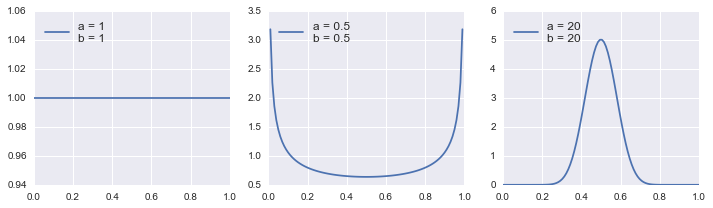

In [3]:
plt.figure(figsize=(10, 3))
x = np.linspace(0, 1, 100)

for ind, (a, b) in enumerate([(1, 1), (0.5, 0.5), (20, 20)]):
    y = stats.beta.pdf(x, a, b)
    plt.subplot(1, 3, ind+1)
    plt.plot(x, y, label='a = %s\nb = %s' % (a, b));
    plt.legend(loc=2, fontsize=12)
plt.tight_layout()

#### 1.5.2.2 Definiendo el _likelihood_

Habiendo definido el _a priori_ veamos ahora el likelihood. Asumiendo que el resultado obtenido al arrojar una moneda no influye en el resultado de posteriores experimentos (es decir los experimentos son independientes entre si) es razonable utilizar como likelihood la distribución binomial.

$$P(y|\theta) = \frac{N!}{y!(N-y)!} \theta^y (1 - \theta)^{N−y}$$

Donde N es la cantidad total de experimentos (monedas arrojadas al aire) e $y$ es la cantidad de caras obtenidas. A los fines prácticos podríamos simplificar la igualdad anterior y convertirla en una proporcionalidad, eliminando el término $\frac{N!}{y!(N-y)!}$ ya que ese término no depende de $\theta$ que es lo que nos interesa averiguar. Por lo que podríamos establecer que:

$$P(y|\theta) \propto \theta^y (1 - \theta)^{N−y}$$

La elección de esta distribución para modelar nuestro problema es razonable ya que $\theta$ es la chance de obtener una cara al arrojar una moneda y ese hecho ha ocurrido $y$ veces, de la misma forma $1-\theta$ es la chance de obtener una seca y lo cual ha sido observado $N-y$ veces.

#### 1.5.2.3 Obteniendo el _a posteriori_

Se puede demostrar que siempre que usemos como _a priori_ una función beta y como _likelihood_ una distribución binomial obtendremos como resultado un _a posteriori_ que será nuevamente una distribución beta con los siguientes parámetros:

$$P(\theta|y) \propto \operatorname{Beta}(\alpha_{a priori} + y, \beta_{a priori} + N - y)$$

Veamos como obtener este resultado, según el teorema de Bayes el _a posteriori_ es el producto del _likelihood_ y del _a priori_.

$$P(\theta|y) \propto p(y|\theta) p(\theta)$$

Por lo tanto, en nuestro caso tendremos que:

$$
P(\theta|y) \propto \theta^y (1 - \theta)^{N−y} \theta^{\alpha-1}(1-\theta)^{\beta-1}
$$

Reordenando, obtenemos que el _a posteriori_ es una distribución Beta (sin considerar la constante de normalización).

$$
P(\theta|y) \propto \theta^{\alpha+y-1}(1-\theta)^{\beta+N−y-1}
$$

Cuando se cumple que dado un _likelihood_ la forma funcional del _a priori_ y la del _a posteriori_ coinciden se dice que el _a priori_ es conjugado con el _likelihood_. Historicamente los problemas en estadística Bayesiana estuvieron restringidos al uso de _a prioris_ conjugados, ya que estos garantizan la tratabilidad matemática del problema, es decir garantizan que es posible obtener una expresión analítica para nuestro problema. En el próximo capítulo veremos técnicas computacionales modernas que permiten obtener _a posterioris_ incluso cuando no se usan _a prioris_ conjugados, lo que ha permitido el resurgimiento de la estadística Bayesiana en las últimas décadas.

#### 1.5.2.4 Notación y visualización de modelos Bayesianos

Para representar modelos en estadística Bayesiana (y en probabilidad en general) se suele utilizar la siguiente notación

$$\theta \sim \operatorname{Beta}(\alpha, \beta)$$
$$y \sim \operatorname{Bin}(n=1, p=\theta)$$

El símbolo $\sim$ indica que la variable a la izquierda se distribuye según la distribución a la derecha. Entonces podríamos decir que $\theta$ es una variable aleatoria con distribución beta, y que beta está definida por los parámetros $\alpha$ y $\beta$, este es nuestro _a priori_. En la siguiente linea tenemos el likelihood el cual está definido por una distribución binomial con parámetros $n=1$ y $p=\theta$.

Graficamente esto se puede representar usar los diagramas de Kruschke:


<img src="imagenes/modelo_1_moneda.png" width=120>

En el primer nivel se observan la distribución que genera los valores _a priori_ de $\theta$, luego el likelihood, y por último los datos. Las flechas indican la vinculación entre las partes del modelo y el signo $\sim$ la naturaleza estocástica de las variables.

#### 1.5.2.5 Obteniendo los datos

Bien, ahora que sabemos como calcular el _a posteriori_, lo único que resta es conseguir los datos. En este ejemplo los datos son sintéticos, es decir los obtuve computacionalemnte mediante un generador de números (pseudo)aleatórios, pero supongamos que realmente tiré una moneda al aires 500 veces y anoté los resultados.

#### 1.5.2.6 Calculando el _a posteriori_.

En el próximo capítulo veremos como usar métodos computacionales para computar un _a posteriori_ sin necesidad de derivarlo analíticamente. Esto es lo que haremos para resolver el resto de los problemas del curso. Pero dado que ya nos tomamos el trabajo de derivar analíticamente la expresión para el _a posteriori_ vamos a usar esa expresión. Si miran el código de la siguiente celda verán que la mayoría de las lineas se encargan de dibujar los resultados y no de calcularlos. El cálculo del _a posteriori_ ocurre en las lineas 18, 22 y 26. Cada una linea de estas lineas computa el _a posteriori_ para cada uno de los _a prioris_ que vimos antes. El cálculo es simple, tan solo se computa el valor del _a posteriori_ (usando la función _pdf_ de la distribución beta provista por SciPy) para 100 puntos igualmente espaciados entre 0 y 1 (linea 7). El loop de empieza en la linea 9 se debe a que exploraremos como cambian las distribuciones _a posteriori_ para distinta cantidad de datos (*n_intentos*). Con una linea negra punteada y vertical se indica el valor real de $\theta$, calor que por supuesto es desconocido en una situación real, pero conocido para mi ya que los datos son sintéticos.

In [1]:
plt.figure(figsize=(12, 9))

dist = stats.beta
n_intentos = [0, 1, 2, 3, 4, 5, 8, 15, 50, 500]
datos = [0, 1, 1, 1, 1, 2, 4, 5, 13, 170]
theta_real = 0.35  # en una situación real este valor es desconocido
x = np.linspace(0, 1, 100)

for idx, N in enumerate(n_intentos):
    if idx == 0:
        plt.subplot(4,3, 2)
    else:
        plt.subplot(4,3, idx+3)
    plt.xlabel(r"$\theta$") 
    plt.gca().axes.get_yaxis().set_ticks([])
    caras = datos[idx]
    # a priori uniforme
    y = dist.pdf(x, 1 + caras, 1 + N - caras)
    plt.plot(x, y, c='b')
    plt.fill_between(x, 0, y, color='b', alpha=0.4)
    # a priori para una moneda sesgada
    y = dist.pdf(x,  0.5 + caras, 0.5 + N - caras)
    plt.plot(x, y, c='r')
    plt.fill_between(x, 0, y, color='r', alpha=0.4)
    # a priori para una moneda no sesgada
    y = dist.pdf(x, 20 + caras,  20 + N - caras)
    plt.plot(x, y, c='g')
    plt.fill_between(x, 0, y, color='g', alpha=0.4)
    
    plt.vlines(theta_real, 0, 4, color='k', linestyles="--", lw=1)
    plt.plot(0, 0, label="%d experimentos,\n %d caras" % (N, caras), alpha=0)
    plt.xlim(0,1)
    leg = plt.legend()

plt.tight_layout()

NameError: name 'plt' is not defined

#### 1.5.2.7 Analizando los resultados

La primer figura del panel muestra los *a priori*, nuestra estimación de $\theta$ dado que no hemos realizado ningún experimento. Las sucesivas nueve figuras muestras las distribuciones *a posteriori* y se indica la cantidad de experimentos y de caras obtenidas.

Este ejemplo es realmente ilustrativo en varios aspectos.

* Dada una cantidad _suficiente_ de datos los resultados tienden a converger sin importar el _a priori_ usado
* La rapidez con la que los resultados convergen varía. En este ejemplo las curvas azul y roja parecen converger con tan solo 8 experimentos, pero se necesitan más de 50 experimentos para que las tres curvas se muestren similares. Aún con 500 experimentos se observan ligeras diferencias.
* En estadística Bayesiana no solo obtenemos el valor más probable si la distribución de probabilidad completa para todos los valores posibles. La dispersión o ancho de las curvas es una medida de la incertidumbre de un resultado.
* Aún cuando $\frac{2}{1} = \frac{8}{4}$ son numéricamente iguales tenemos menor incertidumbre en un resultado cuando el número de experimentos es mayor.
* Partiendo de los _a priori_ unifome (azul) o sesgado (rojo) y habiendo realizado un solo experimento y observado una sola cara, lo más razonable es pensar que estamos frente a una moneda con dos caras!
* La situación cambia drásticamente al ver por primera vez una moneda caer ceca. Ahora lo más probable (dado cualquiera de los tres *a prioris*) es inferir que la moneda no está sesgada. Los valores de $\theta$ exactamente 0 o 1 se vuelven imposibles.
* El a priori no sesgado (verde) es más informativo que los otros dos (la distribución esta más concentrada), por ello se requiere de un número mas grande de experimentos para "moverlo".
* El a priori uniforme (azul) es lo que se conoce como no informativo. El resultado de un análisis Bayesiano usando un _a priori_ no-informativos en general coinciden con los resultados de análisis frecuentistas (en este caso el valor esperado de $\theta = \frac{y}{N}$). 

En general la distribución más familiar para la mayoría de las personas es la distribución Gaussiana, como esta distribución está definida por dos parámetros, la media y la dispersión de ese valor medio, suele resultarnos _natural_ pensar las distribuciones en esos términos. Si queremos expresar la distribución beta en función de la media y la dispersión podemos hacerlo de la siguiente forma:

$$\alpha = \mu \kappa$$
$$\beta = (1 − \mu) \kappa$$

donde $\mu$ es la media y $\kappa$ es un parámetro llamado concentración. Por ejemplo si $\mu=0.5$ y $\kappa=40$, tenemos que:

$$\alpha = 0.5 * 40 = 20$$
$$\beta = (1-0.5) * 40 = 20$$

¿Cuál es el significado de $\kappa$? 

Se puede interpretar como la cantidad de experimentos si/no que realizamos dándonos como resultado la media $\mu$. Es decir el _a priori_ no sesgado (verde) equivale a haber arrojado una moneda 40 veces y haber obtenido como media 0.5. Es decir que si usamos ese _a priori_ recién al observar 40 experimentos si/no, los datos tendrán el mismo peso relativo que el _a priori_, por debajo de este número el _a priori_ contribuye más al resultado final y por encima los datos contribuyen más. El _a priori_ azul (uniforme) equivale a haber observado a la moneda caer una vez cara y otra vez ceca ($\kappa = 2$). Cuando $\kappa < 2$, la cosa se poco un poco extraña, por ejemplo el _a priori_ sesgado (rojo) equivale a haber observado una sola moneda ($\kappa = 1$) pero en una especie de (a falta de mejor analogía) _superposición cuántica de estados_!

## 1.6 Influencia y elección del _a priori_

De los ejemplos anteriores debería quedar claro que los _a priori_ influencian los resultados de nuestros cálculos. Esto tiene total sentido si no fuese así no haría falta incluirlos en el análisis y todo sería más simple (pero no necesariamente mejor). De los ejemplos anteriores también debería quedar claro que a medida que aumentan los datos (como las tiradas de monedas) los resultados son cada vez menos sensibles al _a priori_. De hecho, para una cantidad infinita de datos el _a priori_ no tiene ningún efecto. Exactamente cuantos datos son necesarios para que el efecto del _a priori_ sea despreciable varía según el problema y los modelos usados. En el ejemplo de la moneda se puede ver que 50 experimentos bastan para hacer que dos de los resultados sean prácticamente indistinguibles, pero hacen falta 500 experimentos para que los 3 resultados se vuelvan _casi_ independientes del _a priori_. Esto es así por que los dos primeros _a prioris_ son relativamente _planos_, mientras que el tercer _a priori_ concentra casi toda la probabilidad en una región relativamente pequeña. El tercer a priori no solo considera que el valor más probable de $\theta$ es 0.5, si no que considera que la mayoría de los otros valores son muy poco probables. ¿Cómo cambiarían los resultados si hubiéramos usado como _a priori_ $\operatorname{Beta}(\alpha=2, \beta=2)$?

En casos en que los datos son pocos el _a priori_ tiene un mayor peso relativo en el resultado, esto puede ser ventajoso en caso que contemos con _a prioris_ confiables (basados en información previa proveniente de experimentos, observaciones, teorías o simulaciones). 

Cuando se discute sobre los _a prioris_ se suele hablar de tres tipos, según la información que contengan:

* Informativos: Son *a prioris* que imponen restricciones importantes sobre los valores que pueden tomar los parámetros. Solo deben ser usados en casos que provengan de información previa confiable . Históricamente el uso de _a prioris_ informativos ha sido visto como problemático ya que se los ha asociado con la incorporación de _subjetividades_, diferentes personas pueden usar distintos _a prioris_ debido a que pueden contar con distinta información o con distintas interpretaciones de la misma información. 

* No-informativos: Son _a prioris_ que restringen los menos posible los valores que pueden tomar los datos. Bajo ciertas condiciones un _a priori_ uniforme es no-informativo (solo los datos aportan información), pero esto no es necesariamente cierto en todos los casos, un a priori de Jeffrey puede ser menos informativo que uno uniforme para ciertos modelos. Obtener este tipo de _a priori_ (dado nuestro problema) no siempre es fácil (o posible). Este tema es algo complejo y no lo veremos en el curso. Para el caso de un likelihood binomial el _a priori_ de Jefrey es el _a priori_ que hemos estado llamando _sesgado_.

* Ligeramente informativos: En general los a priori no-informativos no existen (o son difíciles de obtener para problemas complejos). Por lo que varios autores opinan que es mejor hablar (y usar) _a prioris_ ligeramente informativos. La distinción no es solo semántica. Quienes sostienen que es conveniente usar a prioris ligeramente informativos sostienen que la idea general de un a priori es la de regularizar nuestro modelo, es decir restringirlo de forma tal que se evite la posibilidad de obtener valores que carezcan de sentido, por ejemplo números negativos si estamos midiendo distancias o en general valores fuera de ciertos rangos que sabemos imposibles (o que sabemos improbables). 

Entonces, como elegir los a prioris? Bueno esto depende del problema que pretendemos resolver. Si disponemos de un _a priori_ informativo que creemos confiable entonces lo más razonable es usarlo. La estadística Bayesiana (como cualquier forma de modelado) implica tomar decisiones y la elección del _a priori_ es solo una de ellas, hay muchas otras decisiones (que puede considerarse más o menos *subjetivas*) involucradas en ciencia, empezando por la elección de las preguntas que uno intenta contestar, los datos y métodos que decide usar etc. Empeñarse en que el a priori deba ser lo más objetivo posible es un sinsentido ya que implica ignorar información a nuestra disposición en nombre de un supuesto ideal de objetividad. El objetivo de la ciencia debería ser el de dar respuestas lo más razonables posibles dados los datos a nuestro alcance. La ciencia es objetiva en el sentido que intenta obtener resultados reproducibles e independientes del observador y es subjetiva en el sentido que para lograr ese fin es necesario tomar varias decisiones individuales.

En caso de no disponer de a prioris informativos, es buena idea usar a prioris ligeramente informativos. En general los a prioris no-informativos no son una buena idea por que pueden ser difícil (si no imposible) encontrar y en general para la mayoría de los problemas alguna idea (aunque sea vaga) tenemos sobre el problema y es posible incorporar esa información en nuestro análisis via los a prioris.  Además, ¿Dónde está la objetividad en usar un a priori no-informativo que permite valores que sabemos imposibles?

Como veremos más adelante la estadística Bayesiana (como cualquier forma de modelado y por extensión cualquier forma de ciencia) es un proceso iterativo en el cual es necesario contrastar los resultados derivados de el modelo generado con los datos que tenemos a dispocisión. En muchos casos eso implicará cambiar partes del modelo, por ejemplo empezar con un a priori ligeramente informativo, para luego usar uno informativo o incluso comparar resultados generando tantos modelos como _a priori_ podamos pensar. 

Por ultimo, es importante remarcar que es deseable dejar en claro los supuestos de los modelos que usamos en ciencia, especificar un a priori es simplemente especificar nuestros supuestos y someterlos a escrutiño de terceros.

## 1.7 Interpretación del  _a posteriori_

El resultado de un análisis Bayesiano es siempre una distribución de probabilidad. En el caso de la moneda esto es evidente, y en el caso del diagnostico es menos claro ya que la distribución es discreta y solo puede tomar dos valores.

A la hora de comunicar los resultados de un análisis Bayesiano, lo más informativo es reportar la distribución completa, aunque esto no siempre es posible o deseable, por ejemplo el _a posteriori_ de una distribución multidimensional es imposible de dibujar en papel. En general, se suele recurrir a distintas medidas que resumen el _a priori_, por ejemplo reportando la media (o mediana o la moda) de la distribución _a posteriori_. Algo un poco más informativo es reportar además un intervalo de credibilidad. Existen varios criterios para definir intervalos de credibilidad, el que usaremos en este curso (y que también es ampliamente usado en la literatura) es lo que se conoce como intervalo de más alta densidad y nos refereriremos a el por su sigla en ingles, HDI (_highest density interval_ o _highest posterior density interval_). Un HDI es el intervalo que concentra gran parte de la densidad de probabilidad, generalmente el 95%, de tal forma que cualquier punto dentro del intervalo tiene mayor densidad que cualquier punto fuera del intervalo. Para una distribución unimodal, es simplemente el intervalo entre los percentiles 2.5 y 97.5 (asumiendo un HDI de 95%).

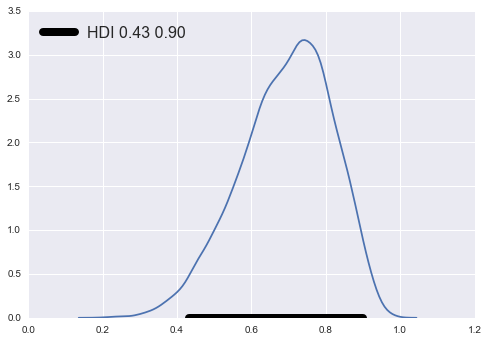

In [5]:
post = dist.rvs(9, 4, size=10000)  # un a posteriori sintético

def naive_hdi(post):
    sns.kdeplot(post)
    HDI = np.percentile(post, [2.5, 97.5])
    plt.plot(HDI, [0, 0], label='HDI {:.2f} {:.2f}'.format(*HDI), linewidth=8, color='k')
    plt.legend(loc=2, fontsize=16);

naive_hdi(post)

Para una distribucion multimodal, el cáclculo del HDI es ligeramente más complejo. Veamos por ejemplo que sucede si aplicamos la función *naive_hdi* a una mezcla de gaussianas.

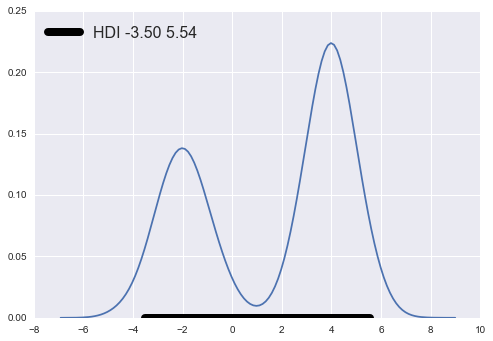

In [6]:
gauss_a = stats.norm.rvs(loc=4, scale=0.9, size=3000)
gauss_b = stats.norm.rvs(loc=-2, scale=1, size=2000)
mix_norm = np.concatenate((gauss_a, gauss_b))

naive_hdi(mix_norm)

Como verán el HDI, calculado de la forma _naive_ incluye valores con baja probabilidad, aproximadamente entre [0, 2]. Para calcular el HDI de forma correcta recurriremos a una función que descargaron al descargar esta notebook *plot_plost*.

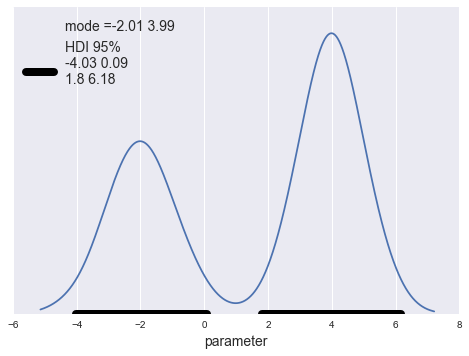

In [7]:
plot_post(mix_norm, roundto=2);

Esta función nos devuelve un HDI (95%) que está compuesto por dos sub-intervalos, además nos devuelve dos modos, uno para cada sub-intervalo.

### 1.7.1 ¿Está nuestra moneda sesgada?

Hay veces que no basta con describir el _a posteriori_ si no que se espera que tomemos algún tipo de decisión basados en nuestra inferencia. Por ejemplo responder si la moneda está sesgada, cuando consideramos que $\theta=0.5$ equivale a no-sesgada. Intuitivamente lo que debemos hacer en este caso es evaluar si el HDI contiene o no el valor que nos interesa.

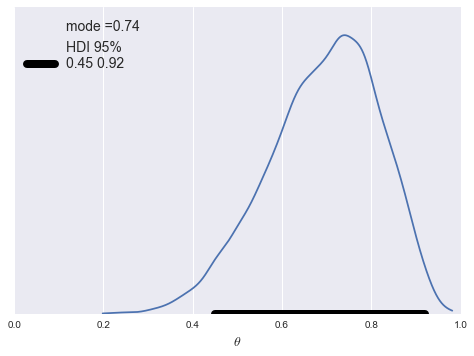

In [8]:
plot_post(post, xlab=r'$\theta$', roundto=2);  # asumamos que post es nuestro a posteriori

En este caso vemos que el valor más probable para $\theta$ (dados nuestro datos y nuestro modelo) es 0,73 y que el HDI va de 0.44 a 0.92, es decir el intervalo de credibilidad incluye a 0.5. Entonces una posible respuesta sería decir que al parecer lo más probable es que la moneda esté sesgada hacia caras, pero que un valor de 0.5 no puede ser totalmente excluido (según los datos y el modelo).

Una versión un poco más formal del análisis anterior es definir primero lo que se conoce como _región de equivalencia práctica_ o ROPE (_Region Of Practical Equivalence_). La razón de definir una ROPE es que es muy dificil que en la práctica obtengamos exactamente el valor 0.5 (estrictamente la probabilidad de un valor exactamente 0.5 es 0). Es por ello, que podríamos definir, para el caso de la moneda, que la ROPE va de 0.45 a 0.55. El ancho de una ROPE es contexto-dependiente y no hay una regla general para construirlo, todo dependerá del problema a resolver.

Bien, habiendo establecido la ROPE podemos usar las dos siguientes reglas:

* El valor de un parámetro es considerado improbable (poco creible o rechazado) si la totalidad de la ROPE cae por fuera del HDI 95% del parámetro en cuestión.

* El valor de un parámetro es aceptado si la ROPE contiene por completo al HDI 95% del parámetro en cuestión

Usando *plot_post*, podemos definir una ROPE e indicar un _valor de comparación_ (0.5 en este caso). 

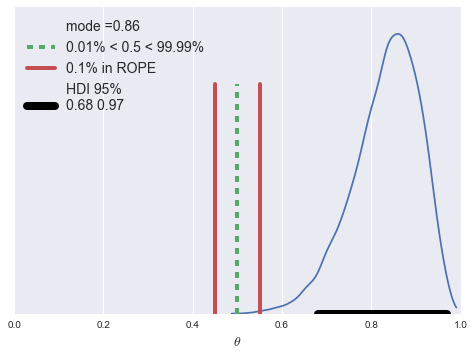

In [9]:
plot_post(dist.rvs(20, 4, size=10000), xlab=r'$\theta$', roundto=2, ROPE=[0.45, 0.55], comp_val=0.5);

*plot_post* nos muestra la ROPE en rojo y en la leyenda el porcentaje de la distribución que cae dentro de la ROPE. En verde nos muestra el _valor de comparación_ y en la leyenda el porcentaje de la distribución que está por debajo y por encima de este valor.

En este caso dado que no hay solapamiento entre la ROPE y el HDI 95% podemos decir, según la primer regla antes descripta, que a los fines prácticos determinamos que nuestra moneda no está sesgada.

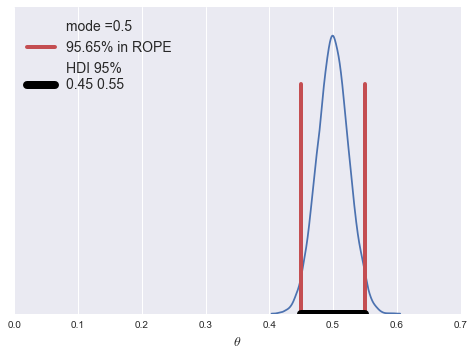

In [10]:
plot_post(dist.rvs(200, 200, size=10000), xlab=r'$\theta$', roundto=2, ROPE=[0.45, 0.55]);

En este caso, y siguiendo la segunda regla, dado que la ROPE contiene por completo al HDI 95% podemos afirmar que la moneda está sesgada. 

¿Qué sucede cuando el HDI y la ROPE se superponen pero la ROPE solo contiene una porción del HDI? En este caso y dado que no se cumplen ninguna de las 2 reglas arriba especificas, debemos concluir (bajo esas reglas), que no es posible ni afirmar ni negar que la moneda esté sesgada y que probablente necesitemos de más datos.

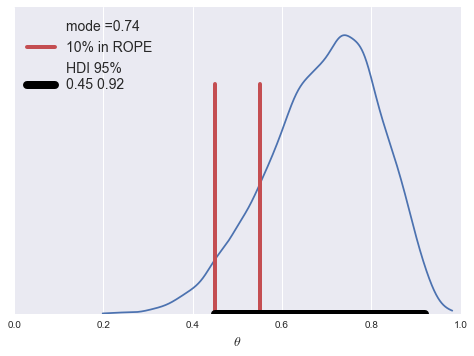

In [11]:
plot_post(post, xlab=r'$\theta$', roundto=2, ROPE=[0.45, 0.55]);

Para una discusión más detallada del uso de la ROPE y en general del equivalente Bayesiano de la popular técnica frecuentista de _prueba de hipótesis nula_ es posible leer el capítulo 12 de _Doing Bayesian Data analysis_ (segunda edición). 

### 1.7.2 Pruebas predictivas _a posteriori_

Que son las ¿Las pruebas predictivas _a posteriori_?. Empezemos describiendo cada término, _de atrás para adelante_. Una vez obtenido el modelo Bayesiano se usa el _a posteriori_ para generar datos $\tilde{y}$, es decir los datos están condicionados en el modelo $\theta$ y en los datos ya observados $y$. Los datos generados son predictivos ya que son los datos que se esperaría ver por ejemplo en un futuro experimento, es decir son variables no onservadas pero potencialmente observables. La prueba consiste en comparar los datos observados con los datos predictivos _a posteriori_. 

$$p(\tilde{y}|y, \theta)$$

Las pruebas predictivas _a posteriori_ son pruebas de autoconsistencia. El principal objetivo de estas pruebas no es determinar si el modelo está mal o bien ya que como dijo George Box _"todos los modelos están equivocados, pero algunos son útiles", si no tratar de determinar en que medida el modelo es capaz de capturar los datos y en que medida no. 

Este ejercicio nos permite evaluar si el modelo es razonable, la idea general no es determinar si un modelo es _correcto_ o no lo es ya que por lo general es dificil sostener la idea de que existe un modelo _verdadero_. El grado de confianza en la _verosimilitud_ de los modelos ciertamente es distinta entre practicantes de distintas disciplinas científicas, en disciplinas como física cuando se estudian sistemas relativamente simples bajo condiciones experimentales extremadamente controladas y haciendo uso de _teorías fuertes_, es probable que se le asigne un alto grado de confianza a ciertos modelos. Pero esto no suele ser cierto en disciplinas como ciencias sociales o biología (aunque sospecho que la variabilidad encontrada en biología es muy alta!). En el caso de contar _a prioris_ muy informativos la evaluación de un modelo también puede ser usado para evaluar si los propios datos son razonables, indicando que tal vez sea necesario conseguir nuevos datos o revisar como se obtuvieron los datos o como se procesaron. 

En definitiva la principal utilidad de las pruebas de predictivas _a posteriori_ debería ser el permitirnos dar una segunda mirada, crítica, al modelo y tratar de entender la razón de discrepancias sistematicas (si las hubiera), estas discrepancias nos pueden llevar a entender mejor los límites del modelo, abandonar el modelo por completo o quizá modificar el modelo.

Si bien se han desarrollado métodos _formales_ o _cuantitativos_ para realizar pruebas predictivas _a posteriori_, una aproximación que suele ser más informativa y simple de interpretar es realizar gŕaficas, que es lo que iremos viendo en los próximos capítulos.

## 1.8 Para seguir leyendo

* Más sobre Teorema de Bayes y modelo binomial:
    * Capítulo 1 y 2 [Data Analysis: A Bayesian Tutorial](http://www.amazon.com/Data-Analysis-A-Bayesian-Tutorial/dp/0198568320) de Devinderjit Sivia & John Skilling
    * Capitulo 2, 4 - 6 [Doing Bayesian Data Analysis (2 edición)](www.amazon.com/gp/product/0124058884) de John Kruschke.
    * Capitulo 1 - 3 de [Statistical Rethinking](https://www.crcpress.com/Statistical-Rethinking-A-Bayesian-Course-with-Examples-in-R-and-Stan/McElreath/9781482253443) de Richard McElreath.
    * Capitulo 1-4 de [Think Bayesian](http://greenteapress.com/thinkbayes/) de Allen B. Downey 
    * Capitulo 1 y 2 de [Bayesian Data Analysis](www.amazon.com/Bayesian-Analysis-Chapman-Statistical-Science/dp/1439840954) de Andrew Gelman



* Material online con tópicos Bayesianos:
    * [Publishable Stuff](http://sumsar.net/)
    * [Probably Overthinking It](http://allendowney.blogspot.com.ar/)
    * [Pythonic Perambulations](http://jakevdp.github.io./)
    * [While My MCMC Gently Samples](http://twiecki.github.io/)
    * [Count Bayesie](https://www.countbayesie.com/)
    * [Bayesian Methods for Hackers](http://camdavidsonpilon.github.io/Probabilistic-Programming-and-Bayesian-Methods-for-Hackers/#contents)


* Las plantillas utilizadas para generar los diagramas de Kruschke, fueron creadas por [Rasmus Bååth's](http://sumsar.net/blog/2013/10/diy-kruschke-style-diagrams/)

In [12]:
import sys, IPython, scipy, matplotlib, platform
print("Esta notebook fue creada en una computadora %s corriendo %s y usando:\nPython %s\nIPython %s\nNumPy %s\nSciPy %s\nMatplotlib %s\nSeaborn %s\n" % (platform.machine(), ' '.join(platform.linux_distribution()[:2]), sys.version[:5], IPython.__version__, np.__version__, scipy.__version__, matplotlib.__version__, sns.__version__))

Esta notebook fue creada en una computadora x86_64 corriendo Ubuntu 15.10 y usando:
Python 3.5.0
IPython 4.0.1
NumPy 1.10.4
SciPy 0.16.1
Matplotlib 1.5.0
Seaborn 0.6.0

